<a href="https://colab.research.google.com/github/rajshekharM/stock-price-prediction-using-LSTM/blob/master/stock_price_predict_Lstm_raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import lstm, time #helper libraries

Using TensorFlow backend.


In [0]:
#Step 1 Load Data
X_train, y_train, X_test, y_test = lstm.load_data('sp500.csv', 50, True)

In [3]:
#Step 2 Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print 'compilation time : ', time.time() - start

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
compilation time :  0.02468085289


In [12]:
#Step 3 Train the model
model.fit(
    X_train,
    y_train,
    batch_size=512,
    nb_epoch=200,
    validation_split=0.05)

Train on 3523 samples, validate on 186 samples
Epoch 1/200
3523/3523 [==============================] - 1s 381us/step - loss: 2.0248e-04 - val_loss: 1.7117e-04
Epoch 2/200
3523/3523 [==============================] - 1s 351us/step - loss: 2.6366e-04 - val_loss: 1.6783e-04
Epoch 3/200
3523/3523 [==============================] - 1s 345us/step - loss: 2.4751e-04 - val_loss: 2.2079e-04
Epoch 4/200
3523/3523 [==============================] - 1s 349us/step - loss: 2.3789e-04 - val_loss: 1.5571e-04
Epoch 5/200
3523/3523 [==============================] - 1s 348us/step - loss: 2.2497e-04 - val_loss: 2.1028e-04
Epoch 6/200
3523/3523 [==============================] - 1s 345us/step - loss: 2.1805e-04 - val_loss: 2.2899e-04
Epoch 7/200
3523/3523 [==============================] - 1s 349us/step - loss: 2.4686e-04 - val_loss: 1.8375e-04
Epoch 8/200
3523/3523 [==============================] - 1s 348us/step - loss: 2.5084e-04 - val_loss: 1.5385e-04
Epoch 9/200
3523/3523 [==========================

yo


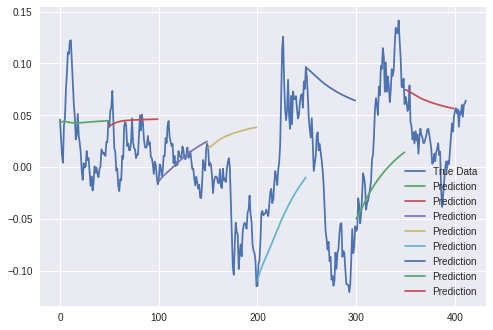

In [13]:
#Step 4 - Plot the predictions!
predictions = lstm.predict_sequences_multiple(model, X_test, 50, 50)
#predictions = lstm.predict_sequence_full(model, X_test, 50)

lstm.plot_results_multiple(predictions, y_test, 50)